## Variable "parroquia_urbana" PRUEBA 1

Cargamos las librerias necesarias para la elaboracion y desarrollo de la minería de datos

In [1]:
!pip install plotly
import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt #Proporciona una forma de trazado similar a MATLAB. pyplot está diseñado principalmente para gráficos interactivos y casos simples de generación de tramas programáticas. La API orientada a objetos se recomienda para gráficos más complejos.
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
#Dataset
# ------------------------------------------------------------------------------
df= pd.read_csv('AT2021_NBD.csv')
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,fecha,dia,hora,latitud,longitud,tipologia,direccion,zona,parroquia_urbana,causas,gravedad,nro_heridos,nro_fallecidos,vehiculos_retenidos,senalizacion_existente,condicion_calzada,condicion_atmosferica
0,01-01,viernes,h11,-3.991993,-79.201155,estrellamiento,orillas del zamora y jose felix de valdivieso,urbana,el valle,conducir en estado de embriaguez,grave,1,0,3,senalizacion horizontal y vertical,bueno,lluvia
1,01-05,martes,h17,-4.020370,-79.217962,choque lateral perpendicular,benjamin carrion y gustavo serrano,urbana,punzara,conducir en estado de embriaguez,grave,1,0,2,senalizacion vertical,bueno,lluvia
2,01-05,martes,h12,-3.987230,-79.202984,choque por alcance,nueva loja y guaranda,urbana,sucre,no mantener la distancia reglamentaria,leve,0,0,2,senalizacion vertical,regular,lluvia
3,01-08,viernes,h10,-3.989410,-79.236506,atropello,angel felicisimo rojas,urbana,sucre,imprudencia del peaton,grave,1,0,1,senalizacion vertical,regular,despejado
4,01-09,sabado,h06,-3.979784,-79.218689,choque lateral angular,isidro ayora y habana,urbana,sucre,conducir en estado de embriaguez,leve,0,0,2,senalizacion horizontal y vertical,bueno,lluvia


Graficamos el mapa de calor de accidentabilidad dentro del cantón Loja

In [2]:
fig = px.density_mapbox(df,lat='latitud', lon='longitud',radius=3,center=dict(lat=-3.99313,lon=-79.20422),zoom=10.5,mapbox_style="open-street-map")

fig.show()

In [3]:
#verifico datos nulos
df.isnull().sum()

fecha                     0
dia                       0
hora                      0
latitud                   1
longitud                  1
tipologia                 0
direccion                 0
zona                      0
parroquia_urbana          0
causas                    0
gravedad                  0
nro_heridos               0
nro_fallecidos            0
vehiculos_retenidos       0
senalizacion_existente    0
condicion_calzada         0
condicion_atmosferica     0
dtype: int64

In [4]:
df=df.loc[:,df.columns!="fecha"]
df=df.loc[:,df.columns!="zona"]
df=df.loc[:,df.columns!="latitud"]
df=df.loc[:,df.columns!="longitud"]
df=df.loc[:,df.columns!="direccion"]
df=df.loc[:,df.columns!="gravedad"]
df=df.loc[:,df.columns!="vehiculos_retenidos"]
df=df.loc[:,df.columns!="senalizacion_existente"]
df=df.loc[:,df.columns!="condicion_calzada"]
df=df.loc[:,df.columns!="condicion_atmosferica"]

In [5]:
df.isnull().sum()

dia                 0
hora                0
tipologia           0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [6]:
df.sample(10)

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
120,domingo,h00,estrellamiento,sucre,conducir en exceso de velocidad,0,0
45,domingo,h02,estrellamiento,el sagrario,conducir en exceso de velocidad,0,0
93,lunes,h21,estrellamiento,punzara,conducir en estado de embriaguez,0,0
167,sabado,h16,atropello,san sebastian,imprudencia del peaton,1,0
207,viernes,h02,estrellamiento,carigan,conducir en exceso de velocidad,0,0
230,jueves,h01,estrellamiento,san sebastian,conducir en exceso de velocidad,0,0
131,jueves,h23,choque por alcance,el sagrario,conducir en estado de embriaguez,0,0
61,miercoles,h12,atropello,el sagrario,imprudencia del conductor,1,0
29,jueves,h16,perdida de pista,sucre,fallas mecanicas no previsibles,2,0
36,viernes,h01,choque frontal excentrico,carigan,imprudencia del conductor,0,1


In [7]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,viernes,h11,estrellamiento,el valle,conducir en estado de embriaguez,1,0
1,martes,h17,choque lateral perpendicular,punzara,conducir en estado de embriaguez,1,0
2,martes,h12,choque por alcance,sucre,no mantener la distancia reglamentaria,0,0
3,viernes,h10,atropello,sucre,imprudencia del peaton,1,0
4,sabado,h06,choque lateral angular,sucre,conducir en estado de embriaguez,0,0


In [8]:
ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El numero de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El numero de columnas(variables) es: ",len(ds.columns))

El numero de filas(observaciones) es:  370
El numero de columnas(variables) es:  7


In [9]:
# tipos de la variables
ds.dtypes

dia                 object
hora                object
tipologia           object
parroquia_urbana    object
causas              object
nro_heridos          int64
nro_fallecidos       int64
dtype: object

In [10]:
df.shape[0]

370

In [11]:
df['causas'].value_counts()

imprudencia del conductor                 161
conducir en estado de embriaguez           88
conducir en exceso de velocidad            75
imprudencia del peaton                     15
no respetar las senales de transito        15
fallas mecanicas no previsibles             6
no mantener la distancia reglamentaria      2
condiciones climaticas desfavorables        2
no ceder el derecho de via                  2
impericia del conductor                     2
cruce de animales en la via                 2
Name: causas, dtype: int64

In [12]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez'
 'no mantener la distancia reglamentaria' 'imprudencia del peaton'
 'conducir en exceso de velocidad' 'no respetar las senales de transito'
 'condiciones climaticas desfavorables' 'no ceder el derecho de via'
 'impericia del conductor' 'imprudencia del conductor'
 'fallas mecanicas no previsibles' 'cruce de animales en la via']


In [13]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez'
 'no mantener la distancia reglamentaria' 'imprudencia del peaton'
 'conducir en exceso de velocidad' 'no respetar las senales de transito'
 'condiciones climaticas desfavorables' 'no ceder el derecho de via'
 'impericia del conductor' 'imprudencia del conductor'
 'fallas mecanicas no previsibles' 'cruce de animales en la via']


Transformamos los datos a numéricos

In [14]:
df['causas']= df['causas'].apply(lambda x: 
                                    1 if x == 'conducir en estado de embriaguez' else 
                                    2 if x == 'imprudencia del conductor' else 
                                    3 if x == 'no ceder el derecho de via' else
                                    4 if x == 'conducir en exceso de velocidad' else 
                                    5 if x == 'cambio brusco e indebido de carril' else
                                    6 if x == 'fallas mecanicas no previsibles' else
                                    7 if x == 'no respetar las senales de transito' else
                                    8 if x == 'invadir carril de circulacion' else
                                    9 if x == 'imprudencia del peaton' else
                                    10 if x == 'no mantener la distancia reglamentaria' else
                                    11 if x == 'razones desconocidas' else
                                    12 if x == 'condiciones climaticas desfavorables' else
                                    13 if x == 'negligencia del conductor' else
                                    14 if x == 'no respetar las ordenes del agente de transito' else
                                    15 if x == 'impericia del conductor' else
                                    16)


In [15]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

['el valle' 'punzara' 'sucre' 'san sebastian' 'carigan' 'el sagrario']


In [16]:
df['parroquia_urbana']= df['parroquia_urbana'].apply(lambda x: 
                                    1 if x == 'el sagrario' else 
                                    2 if x == 'san sebastian' else 
                                    3 if x == 'el valle' else
                                    4 if x == 'sucre' else 
                                    5 if x == 'punzara' else
                                    6 )

In [17]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

[3 5 4 2 6 1]


In [18]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

['estrellamiento' 'choque lateral perpendicular' 'choque por alcance'
 'atropello' 'choque lateral angular' 'roce negativo' 'perdida de carril'
 'perdida de pista' 'choque frontal excentrico' 'colision' 'atipico'
 'arrollamiento' 'volcamiento' 'roce positivo' 'rozamiento'
 'caida de pasajero']


In [19]:
df['tipologia']= df['tipologia'].apply(lambda x: 
                                    1 if x == 'arrollamiento' else 
                                    2 if x == 'atipico' else 
                                    3 if x == 'atropello' else
                                    4 if x == 'caida de pasajero' else 
                                    5 if x == 'choque frontal' else
                                    6 if x == 'choque frontal excentrico' else
                                    7 if x == 'choque frontal longitudinal' else
                                    8 if x == 'choque lateral angular' else
                                    9 if x == 'choque lateral perpendicular' else
                                    10 if x == 'choque por alcance' else
                                    11 if x == 'colision' else
                                    12 if x == 'encunetamiento' else
                                    13 if x == 'estrellamiento' else
                                    14 if x == 'perdida de carril' else
                                    15 if x == 'perdida de pista' else
                                    16 if x == 'roce negativo' else
                                    17 if x == 'roce positivo' else
                                    18 if x == 'rozamiento' else
                                    19 if x == 'volcamiento' else
                                    20 if x == 'volcamiento lateral' else
                                    21)

In [20]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

[13  9 10  3  8 16 14 15  6 11  2  1 19 17 18  4]


In [21]:
df['dia']= df['dia'].apply(lambda x: 
                                    1 if x == 'lunes' else 
                                    2 if x == 'martes' else 
                                    3 if x == 'miercoles' else
                                    4 if x == 'jueves' else 
                                    5 if x == 'viernes' else
                                    6 if x == 'sabado' else
                                    7 )

In [22]:
print(df['dia'].unique()) # datos convertidos a numeros enteros

[5 2 6 7 1 4 3]


In [23]:
df= df[df['parroquia_urbana'] <= 6]

In [24]:
df['hora']= df['hora'].apply(lambda x: 
                                    0 if x == 'h00' else
                                    1 if x == 'h01' else 
                                    2 if x == 'h02' else 
                                    3 if x == 'h03' else
                                    4 if x == 'h04' else 
                                    5 if x == 'h05' else
                                    6 if x == 'h06' else
                                    7 if x == 'h07' else
                                    8 if x == 'h08' else
                                    9 if x == 'h09' else
                                    10 if x == 'h10' else
                                    11 if x == 'h11' else
                                    12 if x == 'h12' else
                                    13 if x == 'h13' else
                                    14 if x == 'h14' else
                                    15 if x == 'h15' else
                                    16 if x == 'h16' else
                                    17 if x == 'h17' else
                                    18 if x == 'h18' else
                                    19 if x == 'h19' else
                                    20 if x == 'h20' else
                                    21 if x == 'h21' else
                                    22 if x == 'h22' else
                                    23)

In [25]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,5,11,13,3,1,1,0
1,2,17,9,5,1,1,0
2,2,12,10,4,10,0,0
3,5,10,3,4,9,1,0
4,6,6,8,4,1,0,0


In [26]:
# datos aleatorios (muestra de 10 elementos)

df.sample(10)


,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
31,1,22,9,2,1,0,0
54,7,21,14,4,6,6,0
2,2,12,10,4,10,0,0
173,3,17,3,4,9,1,0
343,7,20,8,4,2,1,0
237,1,13,18,4,1,0,0
250,4,2,13,4,4,0,0
87,4,16,9,5,4,0,0
311,4,7,9,5,2,3,0
142,1,19,13,6,1,0,0


Verificamos la correlaxion de los datos

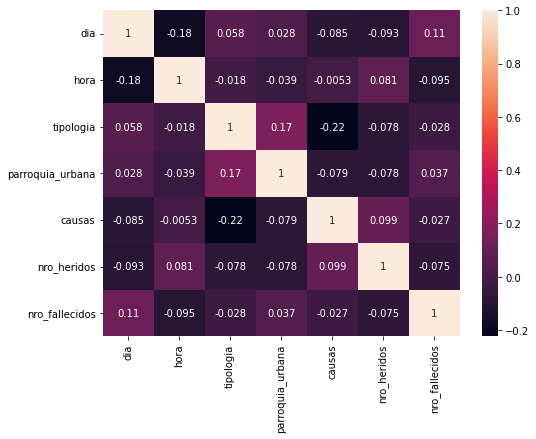

In [27]:
#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [28]:
X = df.iloc[:, [0,1,2,4,5,6]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[3]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,dia,hora,tipologia,causas,nro_heridos,nro_fallecidos
0,5,11,13,1,1,0
1,2,17,9,1,1,0
2,2,12,10,10,0,0
3,5,10,3,9,1,0
4,6,6,8,1,0,0


In [29]:
#presentacion de los atributos de destino
Y.head()

,parroquia_urbana
0,3
1,5
2,4
3,4
4,4


Cargamos el modelo

In [30]:
from joblib import load
arbol_modelo = load('modelo_parroquia_urbana_python.joblib')
y_pred = arbol_modelo.predict(X) 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [31]:
print(y_pred)

[4 1 4 4 4 4 4 4 4 1 4 4 4 4 5 4 4 1 4 1 1 4 5 4 4 1 1 1 1 4 1 1 1 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 1 4 4 4 1 4 4 5 4 4 1 1 1 1 4 1 1 4 4 4 1 4 4 4 1 4 4
 4 4 4 1 4 4 1 4 4 4 1 4 4 1 4 4 4 4 4 4 4 1 4 1 4 4 4 4 4 4 4 4 4 1 1 4 4
 1 4 4 4 4 4 1 1 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 1 1 4 4 4 4 4 4 4 1 4 4 4 1 1 4 4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 1 1 1 4 4 1 1 4
 4 1 1 4 1 4 4 1 4 4 4 4 4 4 4 4 4 4 1 1 4 4 1 4 4 4 4 1 4 4 4 4 4 4 1 4 4
 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 1 4 4 1 1 4 1 4 4 4 4 4 4 4 4 4 1 4
 1 4 5 4 4 4 4 4 4 4 4 4 4 1 4 1 4 4 4 4 1 1 4 1 5 1 4 4 4 4 4 4 4 4 4 4 1
 4 1 4 4 4 1 4 4 4 4 4 4 1 4 4 4 1 4 4 4 1 4 4 1 4 4 4 4 4 4 1 1 4 4 4 1 4]


Creamos la figura del arbol

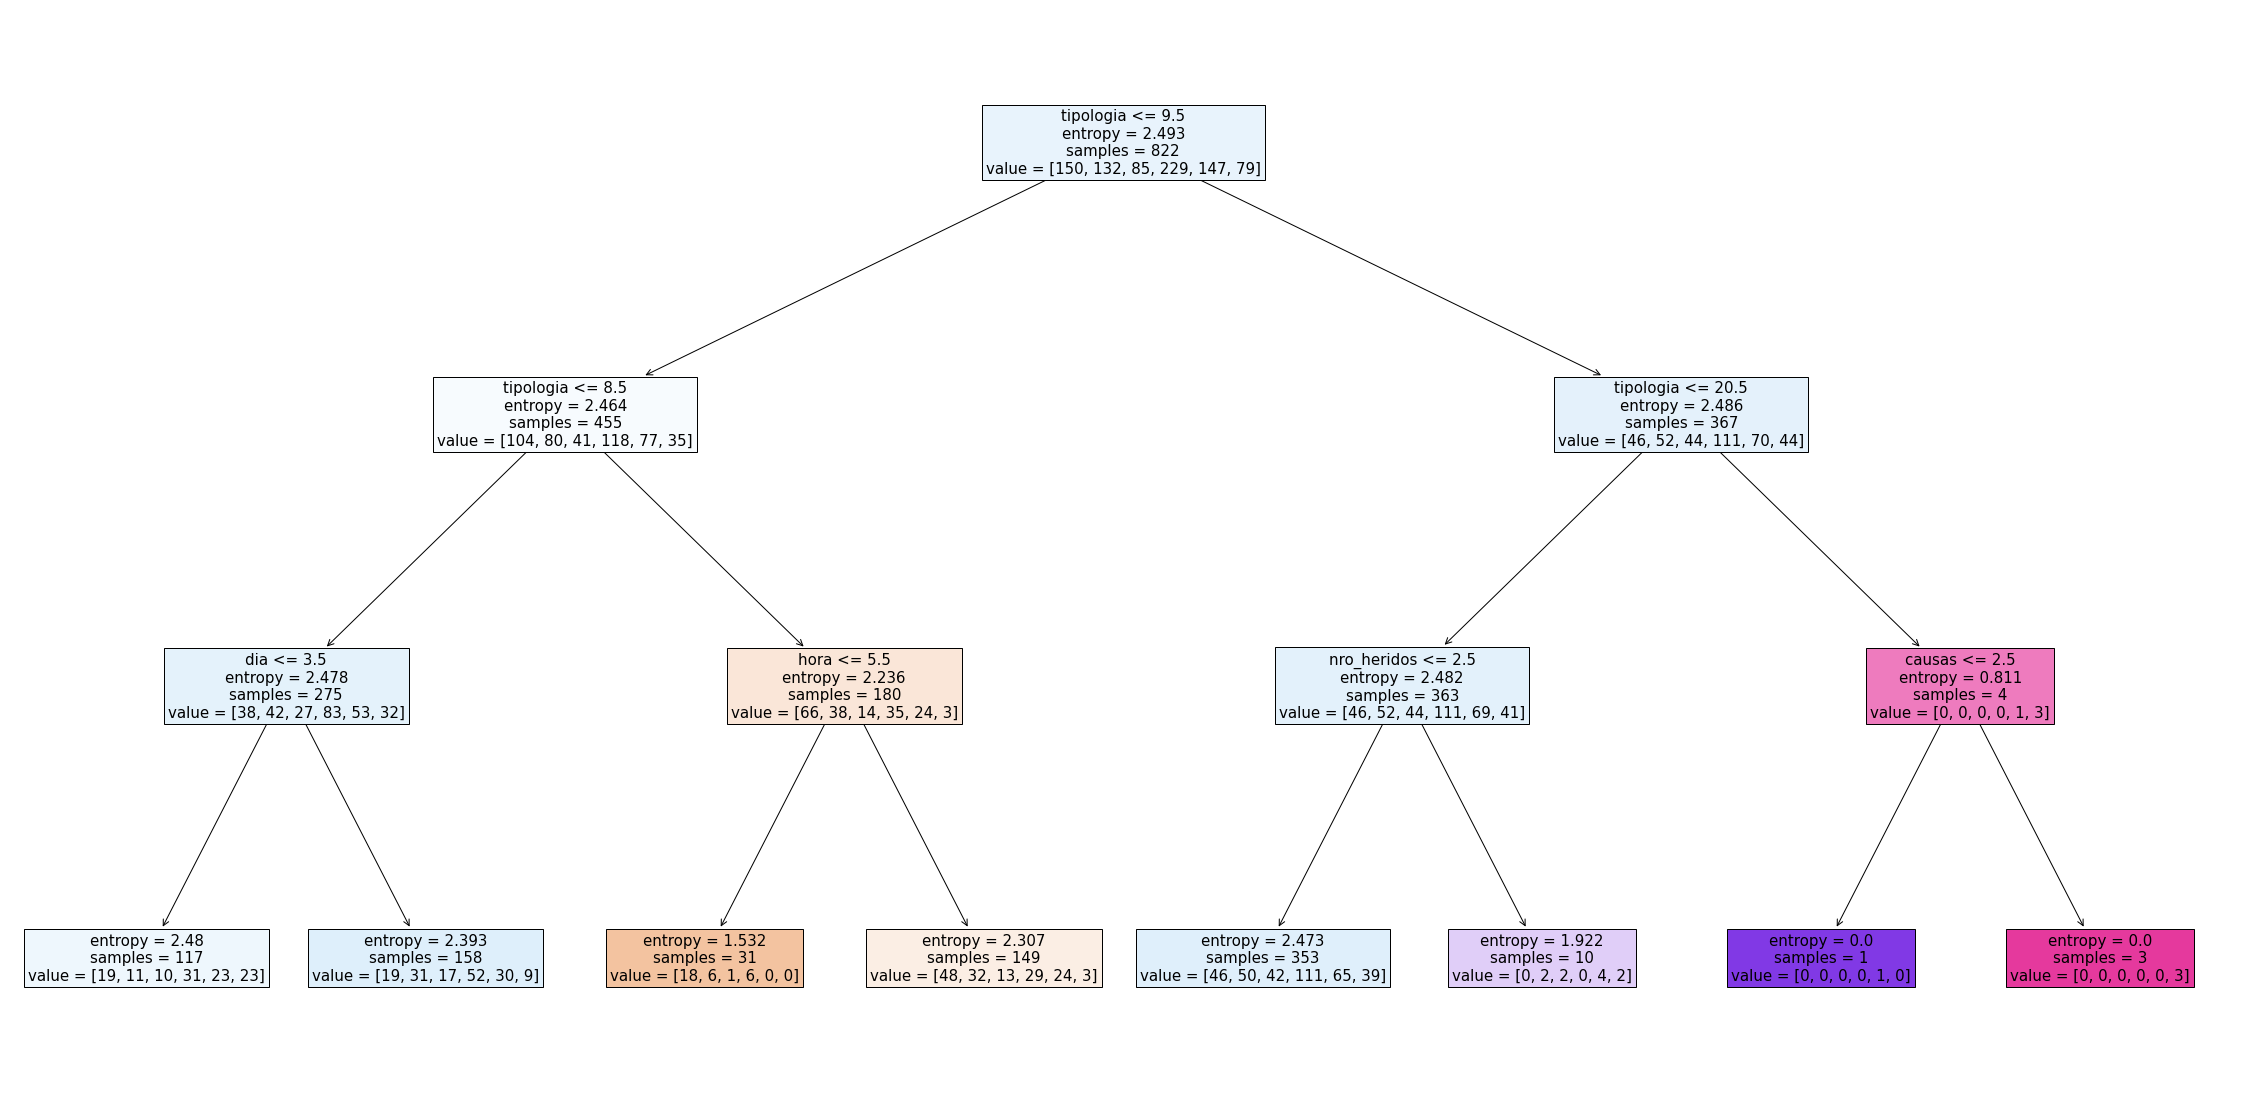

In [32]:
figura_arbol = plt.figure(figsize=(40,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [33]:
figura_arbol.savefig("arbol_colab_parroquia_urbana_2021.png")

In [34]:
# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(Y, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_parroquia_urbana_2021.xlsx")

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
1              0.333333  0.444444  0.380952   63.000000
2              0.000000  0.000000  0.000000   55.000000
3              0.000000  0.000000  0.000000   33.000000
4              0.352313  0.860870  0.500000  115.000000
5              0.200000  0.016129  0.029851   62.000000
6              0.000000  0.000000  0.000000   42.000000
accuracy       0.345946  0.345946  0.345946    0.345946
macro avg      0.147608  0.220241  0.151801  370.000000
weighted avg   0.199773  0.345946  0.225272  370.000000


Pedicciones

In [35]:
#Predicciones
pred = pd.DataFrame(y_pred)
pred.head()

,0
0,4
1,1
2,4
3,4
4,4


Generamos la matriz de confusión

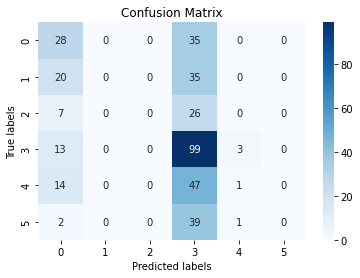

In [36]:
#Matriz de confusion
matriz=confusion_matrix(Y, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [37]:
#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['parroquia_urbana_prediccion'])
original = Y
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,parroquia_urbana_prediccion,parroquia_urbana
0,4,3
1,1,5
2,4,4
3,4,4
4,4,4
5,4,4
6,4,2
7,4,4
8,4,2
9,1,2


In [38]:
#metodo para validar el promedio de exactitud
from sklearn import model_selection
def v_cruzada(arbol_modelo, X_train,y_train):     
    scoring = 'accuracy'
    seed=7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True) ##shuffle para activar el random state
    cv_results = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=scoring)
    #results.append(cv_results)
    #names.append(name)
    print("Iteraciones validacion cruzada:\n",cv_results)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print("Precision media:\n",msg)

Visualizamos la exactitud del modelo

In [39]:
# Precisión
from sklearn.metrics import accuracy_score, recall_score, precision_score
print('Exactitud árboles de decisión: ',accuracy_score(pred,Y)*100)
print('Exhaustividad árboles de decisión: ', recall_score(pred,Y,average='micro')*100)
print('Precision árboles de decisión: ',accuracy_score(pred,Y)*100)

Exactitud árboles de decisión:  34.5945945945946
Exhaustividad árboles de decisión:  34.5945945945946
Precision árboles de decisión:  34.5945945945946


Transformamos las variables

In [40]:
#transformar datos para visualización de variables predictoras y originales
df_combined['parroquia_urbana_prediccion']= df_combined['parroquia_urbana_prediccion'].apply(lambda x: 
                                    'el sagrario' if x == 1 else 
                                    'san sebastian' if x == 2 else 
                                    'el valle' if x == 3 else
                                    'sucre' if x == 4 else 
                                    'punzara' if x == 5 else
                                    'carigan')

df_combined['parroquia_urbana']= df_combined['parroquia_urbana'].apply(lambda x: 
                                    'el sagrario' if x == 1 else 
                                    'san sebastian' if x == 2 else 
                                    'el valle' if x == 3 else
                                    'sucre' if x == 4 else 
                                    'punzara' if x == 5 else
                                    'carigan')

Graficamos las estadisticas originales de los datos

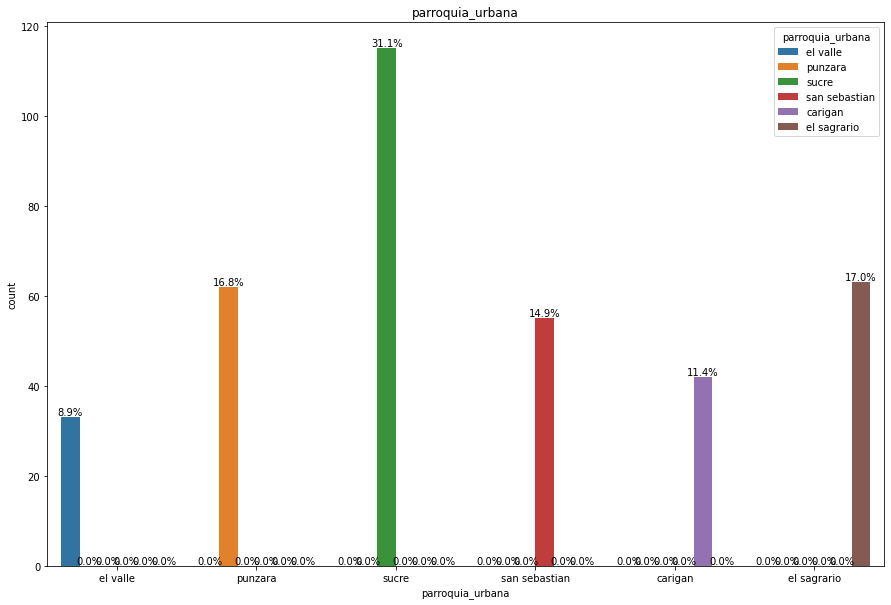

In [41]:
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
sns.countplot(x='parroquia_urbana',hue = 'parroquia_urbana', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('parroquia_urbana')



for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_parroquia_urbana_2021.png")

Graficamos las estadisticas predecidas de los datos

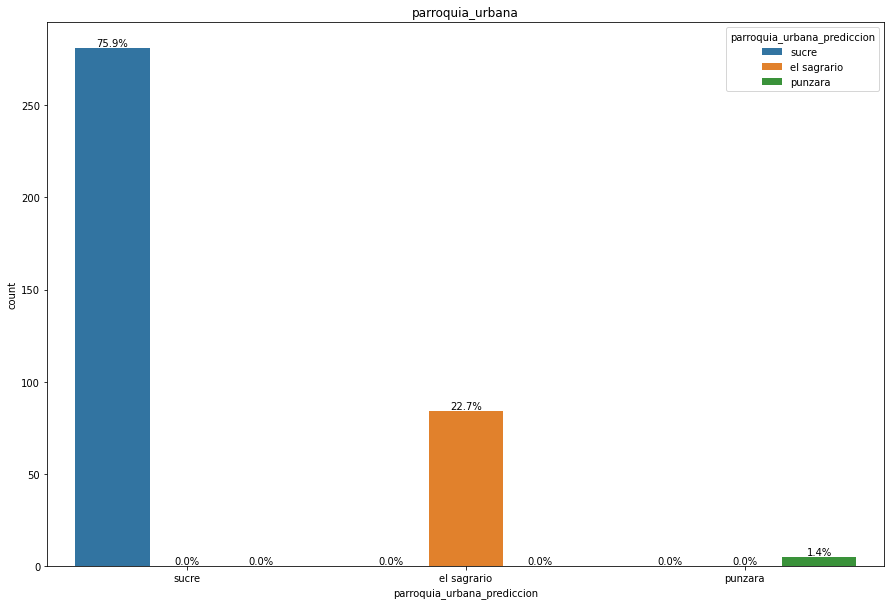

In [42]:
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
sns.countplot(x='parroquia_urbana_prediccion',hue = 'parroquia_urbana_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('parroquia_urbana')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_parroquia_urbana_2021.png")